### SNX Debt Pool Analysis

In [601]:
%cd C:\Dropbox\QUANTstudio\Python\sf_sprint
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import snx_active_stakers_report
SNX_PRICE = 2.9

C:\Dropbox\QUANTStudio\Python\sf_sprint


#### Ingest Data

In [580]:
df_as, df_Msh, df_Osh, df_Mds, df_Ods = snx_active_stakers_report.load_data()
df_Msh, df_Osh, df_Mds, df_Ods = snx_active_stakers_report.process_data(df_Msh, df_Osh, df_Mds, df_Ods, SNX_PRICE)

#### Historical Active Stakers Counts

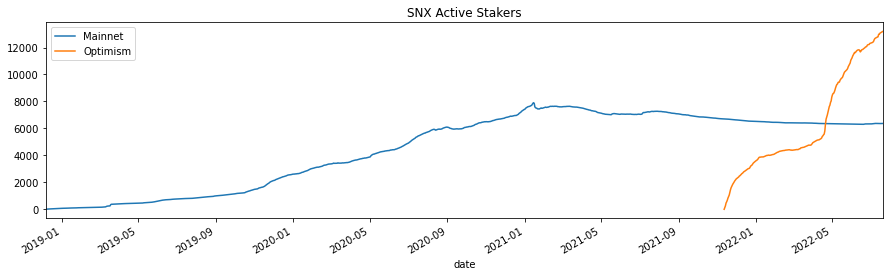

In [585]:
df_as.plot(title='SNX Active Stakers', figsize=(15,4));

#### Mainnet C-Ratio Snapshot
Excluding addresses in the tail, which have very high C-Ratio, showing 3,000 out of ~6,350    
There is a high count of low C-Ratio, below liquidation threshold, small amounts    

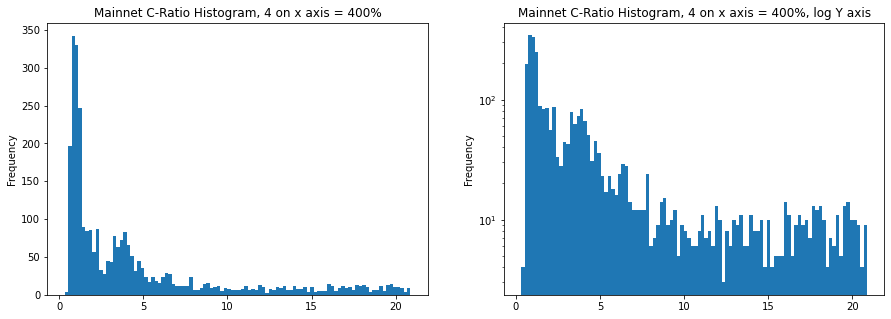

In [594]:
snx_active_stakers_report.mainnet_cratio_snapshot(df_Mds)

In [593]:
df_Mds.sort_values('cRatio').head()

,account,balanceOf,block,collateral,debtBalanceOfUSD,id,timestamp,cRatio,totalCollateralUSD,escrowedSNX
5804,0x1082725e9d32eccec4a12014afd127f172d9cdeb,0.000000,14869761,5.574630,50.501435,0x335094f189176916672d247c663e6dc44920b348c890...,1653873688,0.320118,16.166428,5.574630
3750,0xf47d88d72759864476466e5aed71a4ca2a80e136,60.134228,11851875,60.134228,338.675971,0x312f8376ea3191a0bb32b18a0f1aa9304b566c554353...,1613267196,0.514915,174.389261,0.000000
2418,0x60fc79ec08c5386f030912f056dca91daec3a488,199.392032,11851929,199.392032,1113.058203,0xb8430a2a3ef1aa6c557bb8a155ab14d221ac985ce132...,1613267936,0.519503,578.236893,0.000000
339,0xe70cc56d098824492b68eddfd75ed7ab1447b10d,1349.077268,11846097,6041.281245,33636.130938,0x660126b69eef50a68705fb3364b3b7624786c3cb9b69...,1613189302,0.520860,17519.715610,4692.203977
582,0x28b88cfd875c883cdb61938c97b8d1baabf31c88,0.000000,11844096,2391.183556,13155.094380,0x6e2f4f7e7299b56157aa5b674f65a3e3b0a237dcaf61...,1613162744,0.527129,6934.432311,2391.183556


#### Mainnet C-Ratio Snapshot - Addresses at Risk
Histogram of addresses with lowest C-Ratios, showing 2000    
Is there a way to liquidate them in bulk, due to gas?

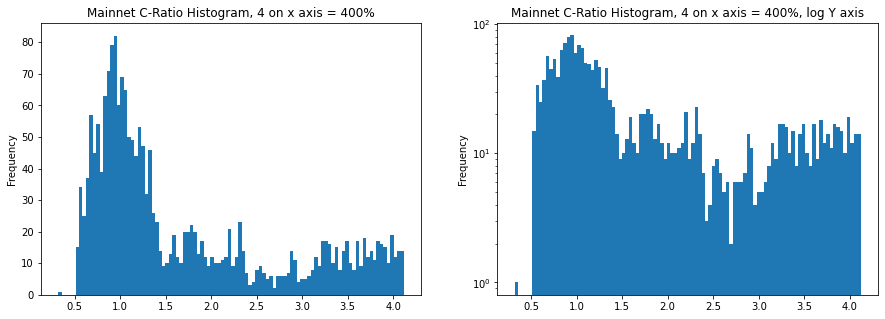

In [602]:
snx_active_stakers_report.mainnet_cratio_snapshot_low_cratio(df_Mds)

#### Optimism C-Ratio Snapshot
Excluding addresses in the tail, which have very high C-Ratio, showing 12,600 out of ~13,150

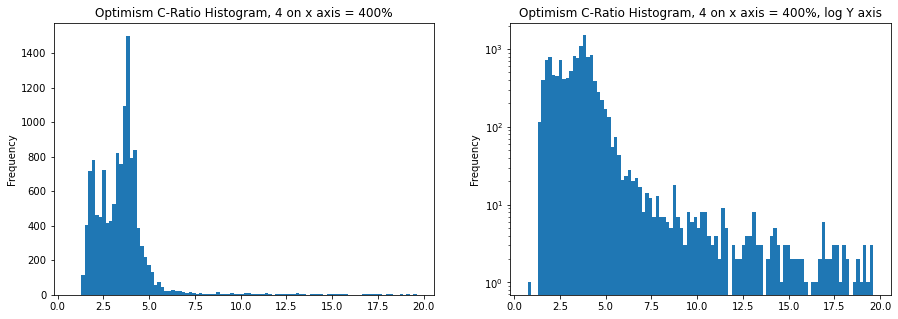

In [603]:
snx_active_stakers_report.optimism_cratio_snapshot(df_Ods)

In [604]:
df_Ods.sort_values('cRatio').head()

,account,balanceOf,block,collateral,debtBalanceOfUSD,id,timestamp,cRatio,totalCollateralUSD,escrowedSNX
11614,0x55a5705453ee82c742274154136fce8149597058,0.000000,14078172,0.312729,1.241318,0x8f8f351bb8d76fbc2d1ba21912c4581072459aee1ae7...,1657270791,0.730605,0.906913,0.312729
2910,0x99ed527be6df7a8196cecfe568ca03bc08863ea5,325.481156,646727,333.296853,713.886225,0x6baf93e2b1a0169b9e402e5a5951832b4260386ff52d...,1638347628,1.353942,966.560875,7.815697
5469,0x072cbde9dc3f219e18cf57083a81735dcc55c701,30.064066,66359,30.064066,63.737846,0xcc768d97945cd7c6e8eaf9b93f115c472fb577e7a803...,1636884634,1.367881,87.185792,0.000000
6402,0x9014fd762b60e3c43eb56e14a1f9255f72162864,14.355162,66636,14.355162,30.206764,0xc728543f2da21ce8eda639965e68a51e2d1a72ae402c...,1636885043,1.378167,41.629971,0.000000
9013,0xca7b2faef7be3aa814fd697b017d871cd241a8fd,2.003810,65670,2.003810,4.169553,0x3e1322e66fe5a914fea7eb8fc12808d71e1235480c47...,1636883417,1.393686,5.811049,0.000000


#### Optimism C-Ratio Snapshot - Addresses at Risk
Histogram of addresses with lowest C-Ratios, showing 7000

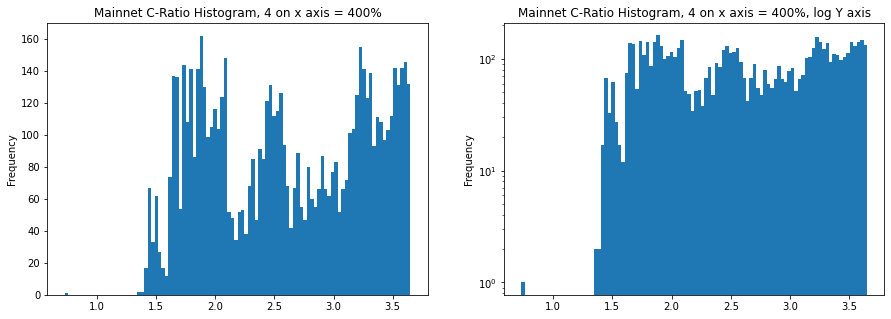

In [605]:
snx_active_stakers_report.optimism_cratio_snapshot_low_cratio(df_Ods)

#### Mainnet & Optimism All Historical Active Stakers Stats

In [503]:
df_Msh[['balanceOf','collateral','transferable','claims','mints']].describe()

,balanceOf,collateral,transferable,claims,mints
count,3.656000e+05,3.656000e+05,3.565560e+05,8119.000000,15142.000000
mean,7.723783e+02,9.257233e+02,5.479553e+02,15.367163,11.112799
std,1.683632e+05,1.781204e+05,1.581328e+05,22.750785,30.243279
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,3.000000
75%,0.000000e+00,2.269160e-13,0.000000e+00,18.000000,8.000000
max,7.726833e+07,7.726833e+07,7.726833e+07,158.000000,1330.000000


In [504]:
df_Osh[['balanceOf','collateral','transferable','claims','mints']].describe()

,balanceOf,collateral,transferable,claims,mints
count,2.644500e+04,2.644500e+04,2.644500e+04,7701.000000,15237.000000
mean,2.902241e+03,3.800230e+03,1.061229e+03,10.445267,3.537179
std,1.818293e+05,2.141674e+05,1.594073e+05,11.479514,7.292227
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,3.670000e-16,1.202942e-01,0.000000e+00,1.000000,1.000000
50%,1.124333e+00,1.862173e+00,0.000000e+00,5.000000,1.000000
75%,1.819137e+01,3.189560e+01,1.000000e-18,17.000000,3.000000
max,2.591886e+07,2.591886e+07,2.591886e+07,37.000000,201.000000


#### Mainnet & Optimism Debt Snapshot Stats

In [505]:
df_Mds[['balanceOf','collateral','debtBalanceOf']].head(200).describe()

,balanceOf,collateral,debtBalanceOf
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,2.070564e+05,3.345108e+05,2.984162e+05
std,6.448295e+05,1.298308e+06,1.108965e+06
min,0.000000e+00,1.377049e+04,0.000000e+00
25%,1.855396e+04,2.207289e+04,2.759142e+02
50%,3.213602e+04,3.762921e+04,3.081852e+04
75%,8.028388e+04,1.017678e+05,8.325375e+04
max,6.171101e+06,1.341082e+07,1.123061e+07


In [506]:
print('As Of: ', time.ctime(df_Mds.timestamp.max()))

As Of:  Wed Jul 20 17:06:01 2022


In [507]:
df_Ods[['balanceOf','collateral','debtBalanceOf']].head(200).describe()

,balanceOf,collateral,debtBalanceOf
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.907513e+05,2.866777e+05,2.188267e+05
std,9.900683e+05,1.623361e+06,1.236833e+06
min,0.000000e+00,4.774245e+04,2.964844e+04
25%,4.755723e+04,6.592277e+04,4.871041e+04
50%,7.075246e+04,1.014743e+05,7.636105e+04
75%,1.246979e+05,1.780584e+05,1.318001e+05
max,1.397210e+07,2.297380e+07,1.748307e+07


In [508]:
print('As Of: ', time.ctime(df_Ods.timestamp.max()))

As Of:  Wed Jul 20 15:40:18 2022


#### Mainnet Debt Snapshot - Top 100 Accounts

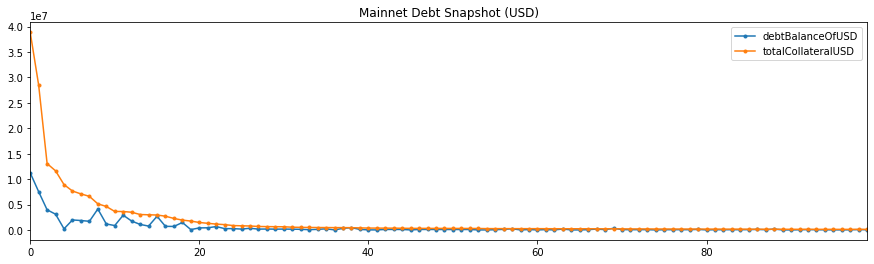

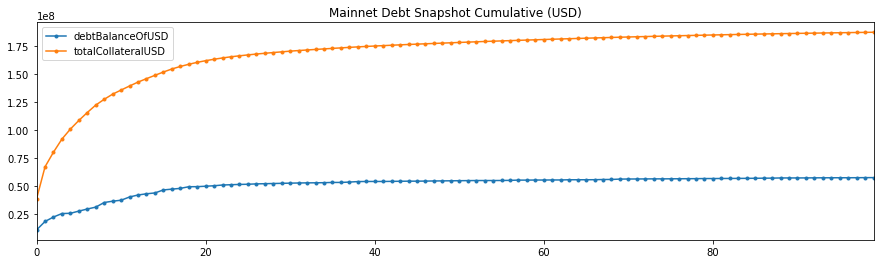

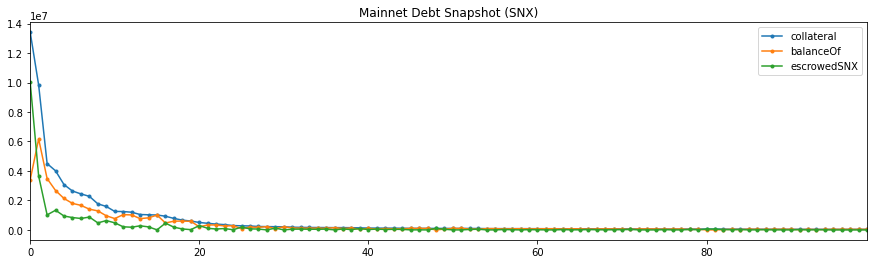

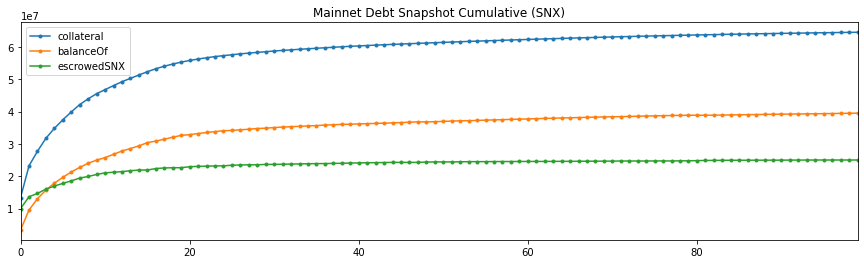

In [607]:
snx_active_stakers_report.mainnet_debt_snapshot_top100(df_Mds)

#### Optimism Debt Snapshot - Top 100 Accounts

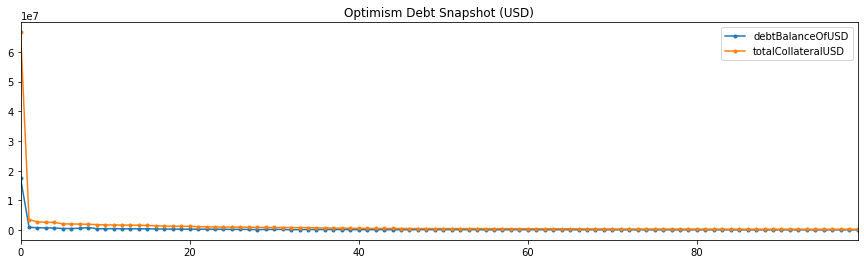

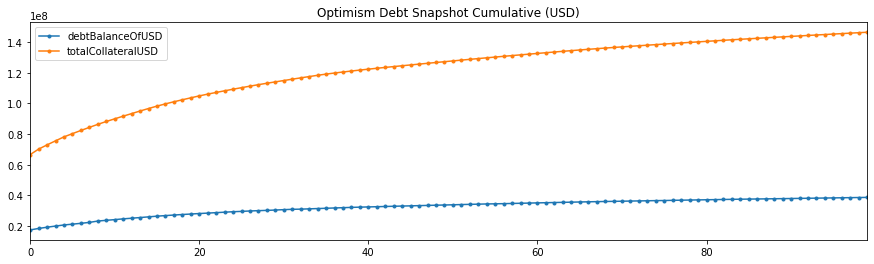

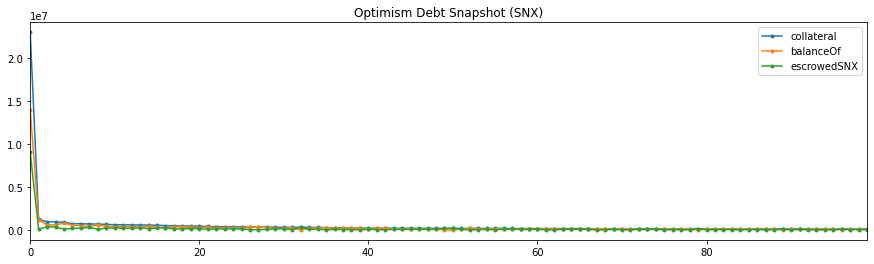

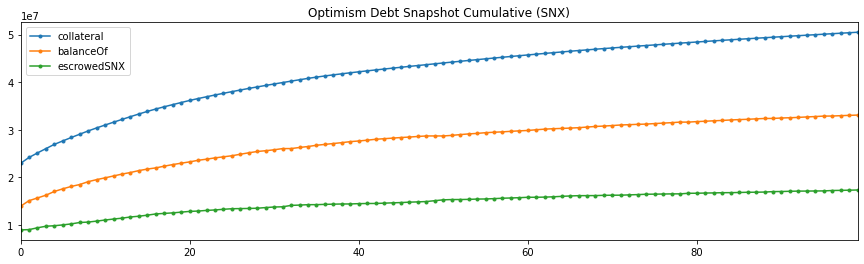

In [609]:
snx_active_stakers_report.optimism_debt_snapshot_top100(df_Ods)

#### Mainnet Scattered Charts

<Figure size 1080x216 with 0 Axes>

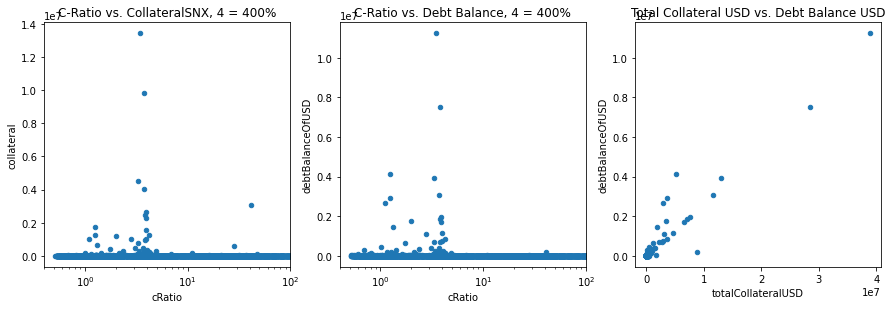

In [635]:
snx_active_stakers_report.scattered_charts(df_Mds)

#### Optimism Scattered Charts

<Figure size 1080x216 with 0 Axes>

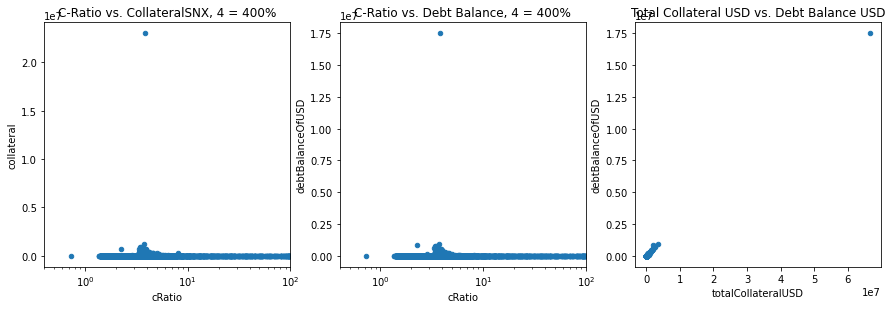

In [636]:
snx_active_stakers_report.scattered_charts(df_Ods)

#### Mainnet Bubble Charts
Same as above but with bubble size indicating Debt Balance 

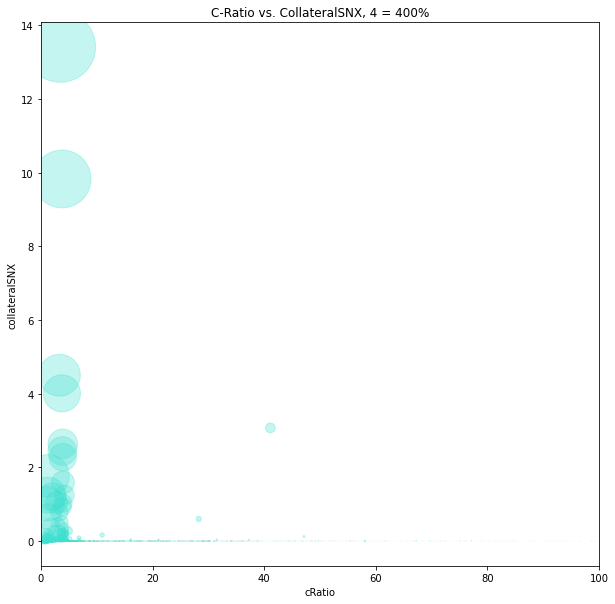

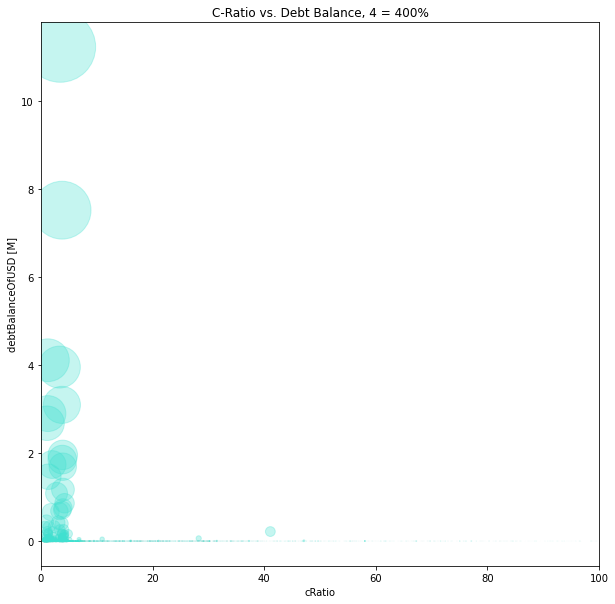

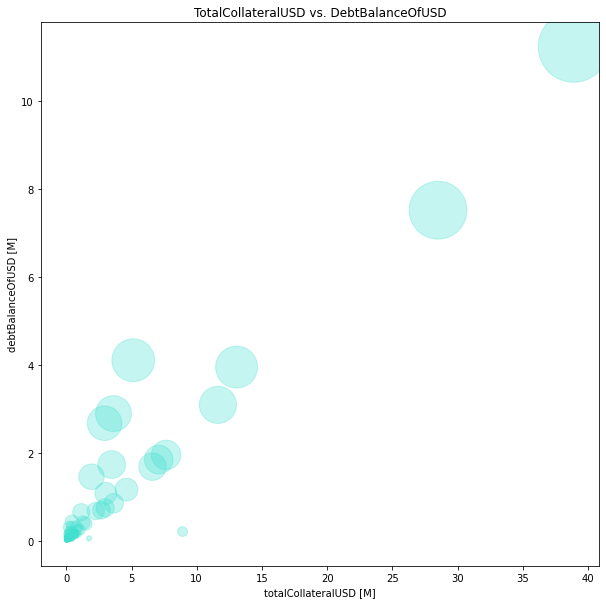

In [629]:
snx_active_stakers_report.bubble_charts(df_Mds)

#### Optimism Bubble Charts
Same as above but with bubble size indicating Debt Balance 

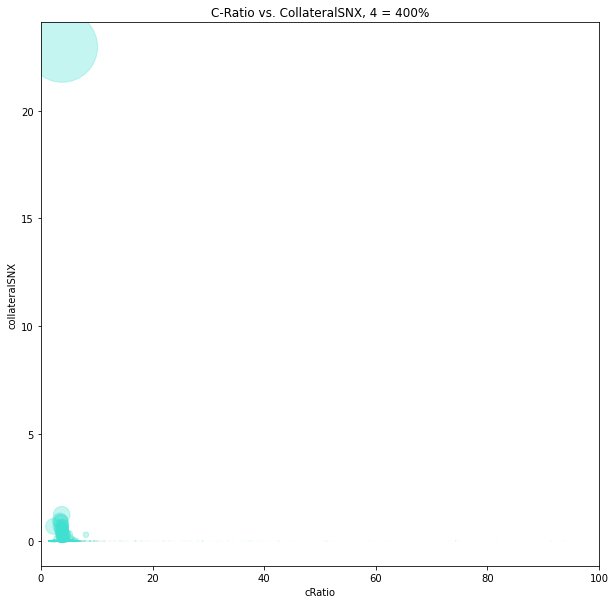

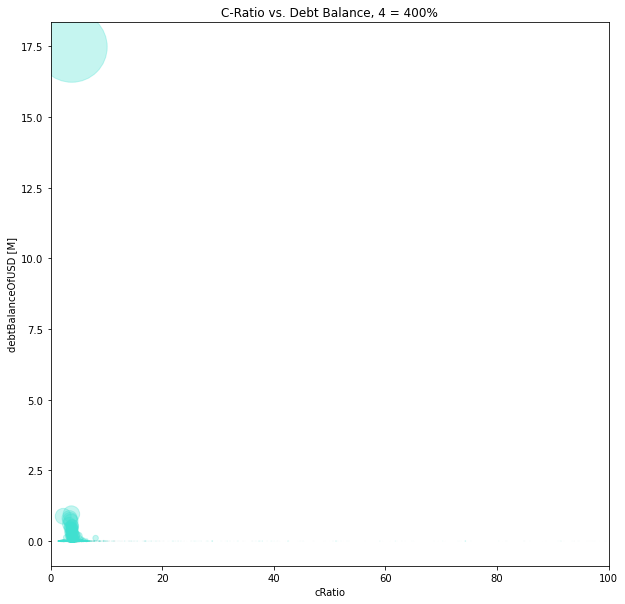

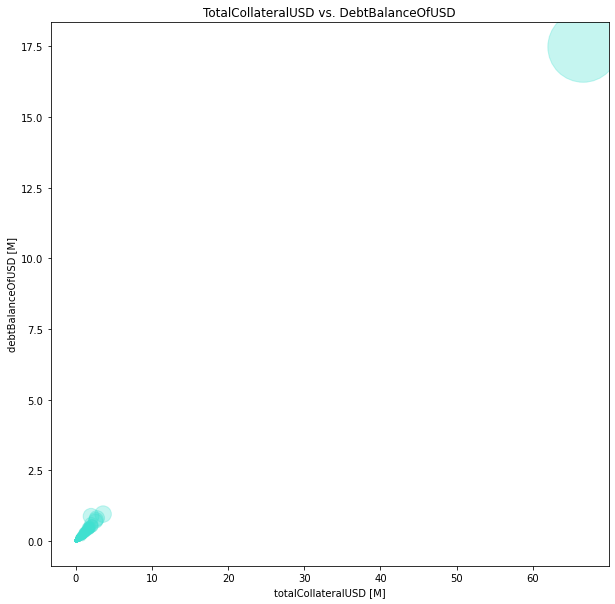

In [630]:
snx_active_stakers_report.bubble_charts(df_Ods)

In [638]:
#df_Ods.head()
#df_Ods[df_Ods['account'] == "address"]